In [334]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,6)

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [296]:
data = pd.read_csv('dataset/Data-Jumlah-Siswa-dan-Guru-Sekolah-Menengah-Atas-SMA.csv', delimiter=',', encoding='latin-1')
data.head()

,nama_sekolah,npsn,bp,status,guru,pd,kecamatan,wilayah
0,SMAN 26 JAKARTA,20102218,SMA,Negeri,36,633,Tebet,Jakarta Selatan
1,SMAN 37 JAKARTA,20102213,SMA,Negeri,46,750,Tebet,Jakarta Selatan
2,SMAN 8 JAKARTA,20102568,SMA,Negeri,58,1040,Tebet,Jakarta Selatan
3,SMAS 17 AGUSTUS 45 JAKARTA,20107274,SMA,Swasta,5,333,Tebet,Jakarta Selatan
4,SMAS ASISI JAKARTA,20107278,SMA,Swasta,18,159,Tebet,Jakarta Selatan


In [297]:
data.wilayah.value_counts()

Jakarta Timur       121
Jakarta Barat       119
Jakarta Selatan     104
Jakarta Utara        88
Jakarta Pusat        57
Kepulauan Seribu      1
Name: wilayah, dtype: int64

In [298]:
region = data['wilayah']

used_col = ['guru','pd']
data = data[used_col]
data.columns = ['teacher','student']
data.head()

,teacher,student
0,36,633
1,46,750
2,58,1040
3,5,333
4,18,159


In [299]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
teacher,490.0,22.791837,16.686865,0.0,10.00,18.0,36.00,76.0
student,490.0,348.763265,289.603751,0.0,100.25,246.5,616.25,1197.0


In [300]:
# scaler = preprocessing.MinMaxScaler()
# data['teacher'] = scaler.fit_transform(data['teacher'].reshape(-1, 1))
# data['student'] = scaler.fit_transform(data['student'].reshape(-1, 1))

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
teacher,490.0,22.791837,16.686865,0.0,10.00,18.0,36.00,76.0
student,490.0,348.763265,289.603751,0.0,100.25,246.5,616.25,1197.0


Text(0.5,0,u'teacher/student')

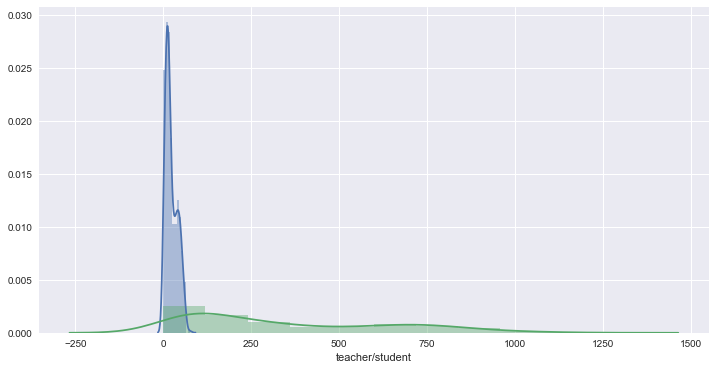

In [335]:
plot_teacher = sns.distplot(data['teacher'])
plot_student = sns.distplot(data['student'])
plt.xlabel('teacher/student')

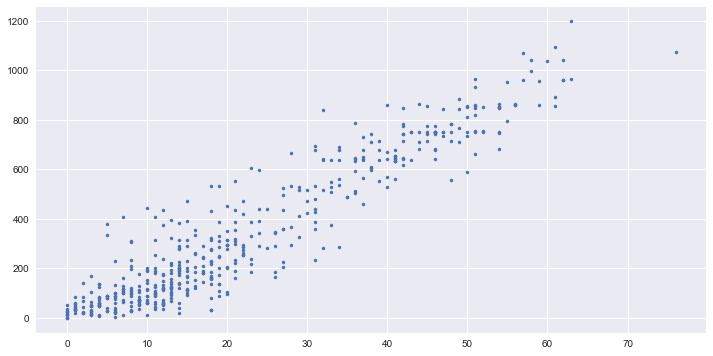

In [336]:
teacher = data['teacher'].values
student = data['student'].values

X=data.iloc[:,[0,1]].values
plt.scatter(teacher, student, s=10)

For cluster = 3, the shilouette coefficient is 0.627445
For cluster = 4, the shilouette coefficient is 0.584313
For cluster = 5, the shilouette coefficient is 0.589332
For cluster = 6, the shilouette coefficient is 0.569077
For cluster = 7, the shilouette coefficient is 0.568606
For cluster = 8, the shilouette coefficient is 0.559558


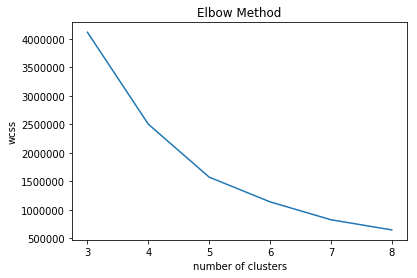

In [316]:
wcss = []

for i in range(3,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    label = kmeans.labels_
    silhoutte_coeff = silhouette_score(X, label, metric='euclidean')
    print('For cluster = %i, the shilouette coefficient is %f' % (i,silhoutte_coeff))
    
plt.plot(range(3,9),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [318]:
# fitting with 4 clusters

kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = kmeans_4.fit_predict(data)

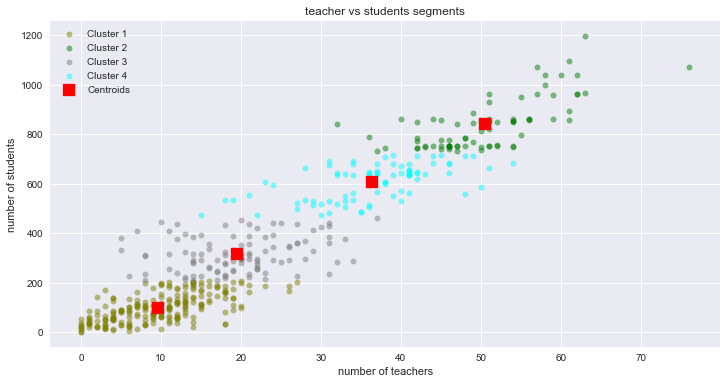

In [338]:
# data_plot = data.reset_index().values

#Visualizing the clusters for k=4
plt.figure(figsize=(12,6))

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=30, c='olive',label='Cluster 1', alpha=0.5)
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=30, c='green',label='Cluster 2', alpha=0.5)
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=30, c='gray',label='Cluster 3', alpha=0.5)
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=30, c='cyan',label='Cluster 4', alpha=0.5)
# # cluster centers
plt.scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], s=150, marker='s', c='red', label='Centroids')
plt.title('teacher vs students segments')
plt.xlabel('number of teachers')
plt.ylabel('number of students')
plt.legend()
plt.show()

In [339]:
kmeans_4.cluster_centers_

array([[  9.67857143,  98.16071429],
       [ 50.55128205, 841.08974359],
       [ 19.5754717 , 316.66981132],
       [ 36.36585366, 606.51219512]])

In [351]:
data['region'].value_counts()

Jakarta Timur       121
Jakarta Barat       119
Jakarta Selatan     104
Jakarta Utara        88
Jakarta Pusat        57
Kepulauan Seribu      1
Name: region, dtype: int64

In [370]:
data['region_id'] = data['region'].factorize()[0]
data.sample(5)

,teacher,student,region,region_ud,region_id
213,13,323,Jakarta Pusat,2,2
347,12,436,Jakarta Pusat,2,2
26,8,107,Jakarta Utara,1,1
112,11,91,Jakarta Utara,1,1
276,16,129,Jakarta Selatan,0,0


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

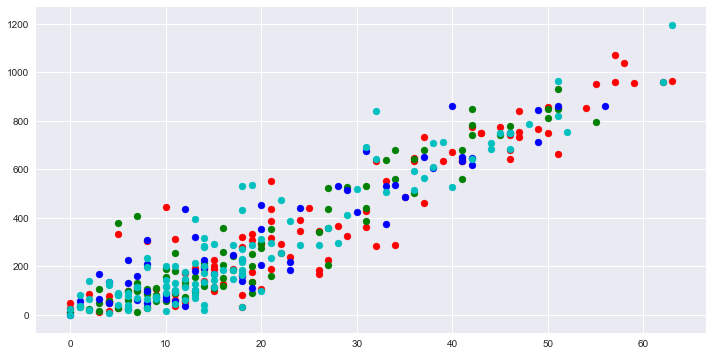

In [395]:
c = ['r','g','b','c','o','g']

for i in data['region_id'].unique():
    teacher = data[data['region_id'] == data['region_id'].unique()[i]]['teacher']
    student = data[data['region_id'] == data['region_id'].unique()[i]]['student']
    plt.scatter(teacher, student, color=c[i])